In [85]:
import pandas as pd
import seaborn as sns
import numpy as np

In [86]:
train = pd.DataFrame(pd.read_csv('data/processed/challenge_suicide_total_deaths_dataset.csv'))
test = pd.DataFrame(pd.read_csv('data/processed/test_2016_dataset.csv'))

# Exploratory Analysis

## Characteristics of the features

Let's look at how our training and testing datasets look like. 

First we use a head to look at the first few row of the dataframe.

In [352]:
train.head()

,country,year,aged_15plus_employment_rate_percent,at_least_basic_sanitation_overall_access_percent,bwelfr_idea,cell_phones_total,child_mortality_0_5_year_olds_dying_per_1000_born,children_per_woman_total_fertility,demox_eiu,freligion_idea,...,population_aged_40_59_years_male_percent,population_aged_60plus_years_female_percent,population_aged_60plus_years_male_percent,population_total,services_percent_of_gdp,suicide_total_deaths,total_gdp_us_inflation_adjusted,urban_population_percent_of_total_x,urban_population_percent_of_total_y,suicide_rate
0,Cuba,2006,0.525,0.884,0.781,1.198214e-09,6.93,1.57,0.352,0.504,...,0.267,0.166,0.149,11300000,0.733,1640.0,5.550000e+10,0.762,8.3,0.000145
1,Cuba,2007,0.533,0.889,0.820,1.550630e-09,6.71,1.58,0.352,0.506,...,0.274,0.170,0.153,11300000,0.724,1630.0,5.950000e+10,0.763,11.0,0.000144
2,Cuba,2008,0.539,0.893,0.820,2.646684e-09,6.51,1.60,0.352,0.505,...,0.281,0.174,0.156,11200000,0.723,1630.0,6.190000e+10,0.764,11.3,0.000146
3,Cuba,2009,0.550,0.897,0.822,4.950574e-09,6.32,1.62,0.352,0.503,...,0.287,0.178,0.160,11200000,0.725,1650.0,6.280000e+10,0.765,12.3,0.000147
4,Cuba,2010,0.541,0.902,0.820,7.971939e-09,6.15,1.64,0.352,0.508,...,0.294,0.183,0.164,11200000,0.725,1670.0,6.430000e+10,0.766,10.7,0.000149


In [353]:
test.head()

,country,year,aged_15plus_employment_rate_percent,at_least_basic_sanitation_overall_access_percent,bwelfr_idea,cell_phones_total,child_mortality_0_5_year_olds_dying_per_1000_born,children_per_woman_total_fertility,demox_eiu,freligion_idea,...,population_aged_40_59_years_female_percent,population_aged_40_59_years_male_percent,population_aged_60plus_years_female_percent,population_aged_60plus_years_male_percent,population_total,services_percent_of_gdp,suicide_total_deaths,total_gdp_us_inflation_adjusted,urban_population_percent_of_total_x,urban_population_percent_of_total_y
0,Cuba,2016,0.531,0.928,0.821,3990000.0,5.24,1.72,0.346,0.544,...,0.322,0.317,0.2100,0.1840,11300000,0.720,1750.0,7.420000e+10,0.769,12.2
1,Egypt,2016,0.419,0.941,0.575,97800000.0,22.80,3.27,0.331,0.391,...,0.180,0.175,0.0850,0.0712,94400000,0.545,3090.0,2.610000e+11,0.427,5.4
2,Honduras,2016,0.649,0.802,0.605,7830000.0,18.80,2.46,0.592,0.816,...,0.166,0.154,0.0721,0.0610,9270000,0.584,307.0,1.960000e+10,0.558,8.2
3,Moldova,2016,0.410,0.758,0.644,3790000.0,16.20,1.24,0.601,0.715,...,0.272,0.262,0.1980,0.1400,4070000,0.540,728.0,8.740000e+09,0.425,7.5
4,Bosnia and Herzegovina,2016,0.350,0.953,0.788,3400000.0,6.03,1.36,0.487,0.777,...,0.291,0.295,0.2450,0.2000,3390000,0.555,352.0,1.890000e+10,0.475,9.2


### Now let's investigate the dimensions and the features of the data frame and check the data types and possible missing values

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 33 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                1408 non-null   object 
 1   year                                                   1408 non-null   int64  
 2   aged_15plus_employment_rate_percent                    1408 non-null   float64
 3   at_least_basic_sanitation_overall_access_percent       1408 non-null   float64
 4   bwelfr_idea                                            1408 non-null   float64
 5   cell_phones_total                                      1408 non-null   float64
 6   child_mortality_0_5_year_olds_dying_per_1000_born      1408 non-null   float64
 7   children_per_woman_total_fertility                     1408 non-null   float64
 8   demox_eiu                                       

The training dataset contains 33 columns and 1408 rows, we can see that there are no missing values as we processed these before hand when aggregating our data form the various sources. 

We can see our target "suicide_total_deaths" which we will be trying to predict. 

Moreover we can see that all the data is numerical except for the countries.

Let's do a sanity check to make sure everything is coherent with the testing dataset: 

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 33 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                140 non-null    object 
 1   year                                                   140 non-null    int64  
 2   aged_15plus_employment_rate_percent                    140 non-null    float64
 3   at_least_basic_sanitation_overall_access_percent       140 non-null    float64
 4   bwelfr_idea                                            140 non-null    float64
 5   cell_phones_total                                      140 non-null    float64
 6   child_mortality_0_5_year_olds_dying_per_1000_born      140 non-null    float64
 7   children_per_woman_total_fertility                     140 non-null    float64
 8   demox_eiu                                         

We indeed have 33 columns and no missing data. 

Let's check how many countries are taken into account in the dataset:

In [91]:
unique_countries = train['country'].unique()
print(unique_countries)
print('Number of countries evaluated :', len(unique_countries))


['Cuba' 'Egypt' 'Honduras' 'Moldova' 'Bosnia and Herzegovina' 'Ghana'
 'Saudi Arabia' 'Mali' 'Pakistan' 'Nicaragua' 'Algeria' 'Sri Lanka'
 'Finland' 'Czech Republic' "Cote d'Ivoire" 'Sweden' 'Rwanda' 'Lithuania'
 'Indonesia' 'Kenya' 'Bahrain' 'Sudan' 'El Salvador' 'Austria' 'Morocco'
 'Uzbekistan' 'Spain' 'Mauritania' 'Slovak Republic' 'Chile' 'Nigeria'
 'Lesotho' 'Singapore' 'Russia' 'Philippines' 'Thailand' 'Timor-Leste'
 'Mauritius' 'Madagascar' 'Canada' 'Japan' 'Lao' 'New Zealand' 'Italy'
 'Zambia' 'Belarus' 'Costa Rica' 'Gabon' 'Kazakhstan' 'Liberia' 'Mongolia'
 'Angola' 'Malaysia' 'Serbia' 'Sierra Leone' 'Paraguay' 'Uganda'
 'Cameroon' 'Slovenia' 'Greece' 'Latvia' 'Kuwait' 'Romania' 'Brazil'
 'North Macedonia' 'Oman' 'Belgium' 'Colombia' 'Dominican Republic'
 'India' 'Norway' 'Turkmenistan' 'Burundi' 'Tajikistan' 'Jamaica'
 'Netherlands' 'Australia' 'United States' 'Kyrgyz Republic' 'Niger'
 'Ireland' 'Tunisia' 'Croatia' 'Hungary' 'Botswana' 'Panama' 'Tanzania'
 'South Africa' 'A

We are therefore trying to predict the number of suicides in 143 countries based on their historical socioeconomic and health indicators. Now let's check if the historical data for each country is of the same size. 

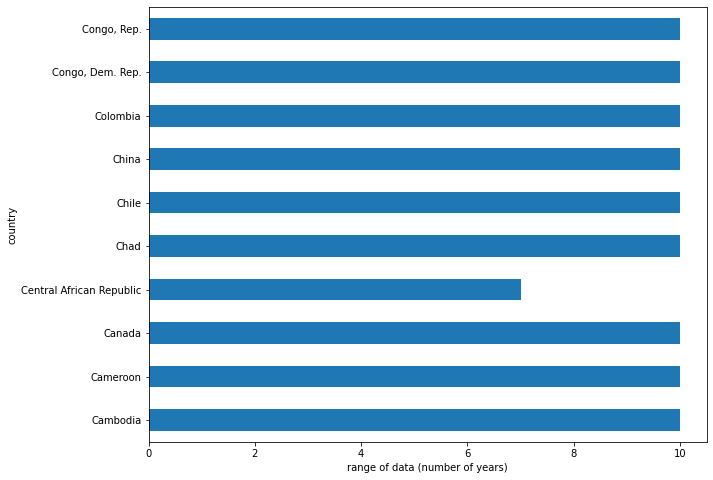

In [92]:
import matplotlib.pyplot as plt
counts = train.groupby('country').size()
counts[20:30].plot(kind='barh',figsize=(10,8))
plt.yticks(fontsize=10)
plt.xlabel('range of data (number of years)')
plt.show()

In [93]:
print('Central African Republic\n------\n', train[train['country']=='Central African Republic']['year'])
print('Cameroon\n------\n', train[train['country']=='Cameroon']['year'])

Central African Republic
------
 1341    2009
1342    2010
1343    2011
1344    2012
1345    2013
1346    2014
1347    2015
Name: year, dtype: int64
Cameroon
------
 563    2006
564    2007
565    2008
566    2009
567    2010
568    2011
569    2012
570    2013
571    2014
572    2015
Name: year, dtype: int64


We have data for 145 countries and we can see that we do not have the same number of data points (years) for every country. For example the Central African Republic only has 7 years of data while Cameroon has data over 10 years. 

Now let's  isolate the target from our descriptors and check the ranges and properties of the data:

In [288]:
Y_train = train['suicide_total_deaths']/train['population_total']*100
X_train = train.drop(['suicide_total_deaths'],axis=1)
Y_test = test['suicide_total_deaths']/test['population_total']*100
X_test = test.drop(['suicide_total_deaths'],axis=1)


### Target: 

In [289]:
Y_train.describe()

count    1408.000000
mean        0.010776
std         0.007717
min         0.002175
25%         0.005513
50%         0.008321
75%         0.013651
max         0.047546
dtype: float64

There seems to be a high variance in the number of suicide deaths (the standard deviation is around 0.0077) and we see that the mean is at around 0.01 deaths. Let's plot the distribution of the target

ShapiroResult(statistic=0.9884588718414307, pvalue=4.0619840824263065e-09)

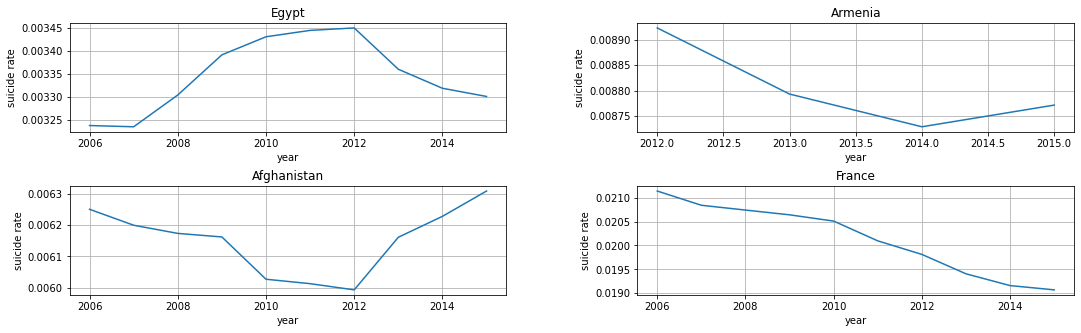

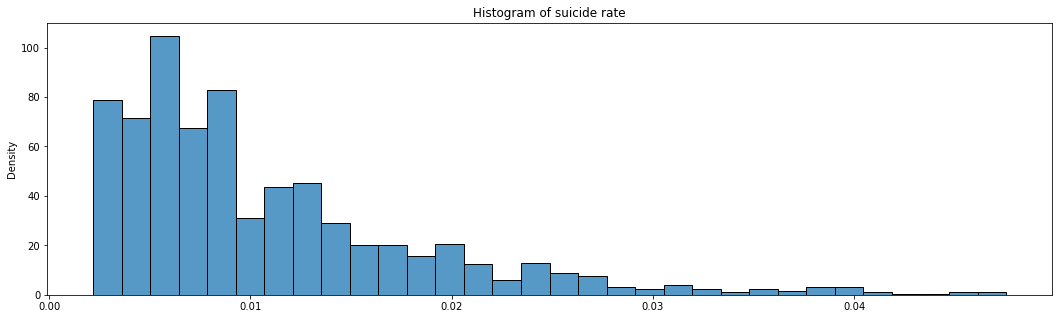

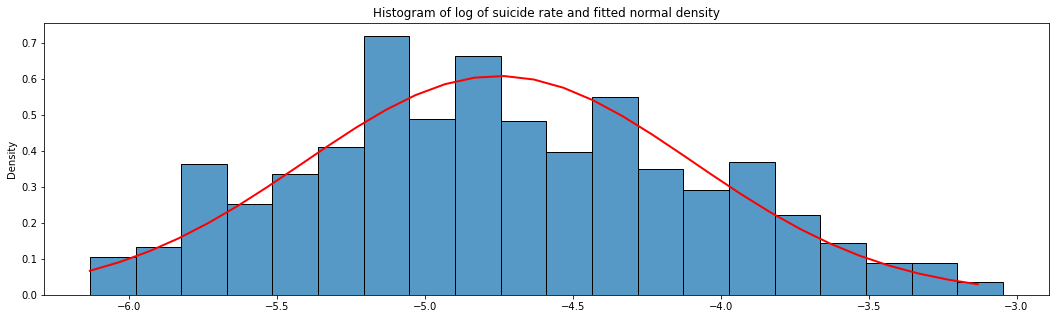

In [349]:
from scipy import stats    
%matplotlib inline 
countries = ['Egypt','Armenia','Afghanistan','France']

fig, ax = plt.subplots(2,2,figsize=(18,5))
fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.5)

for i, val in enumerate(zip(countries,ax.flatten())):
    val[1].plot(X_train[X_train['country']== val[0]]['year'],Y_train.loc[X_train['country']== val[0]])
    val[1].set_title(val[0])
    val[1].set_xlabel('year')
    val[1].set_ylabel('suicide rate')
    
    val[1].grid()

x_min, x_max = Y_train.min(), Y_train.max()
x_min2, x_max2 = np.log(Y_train).min(), np.log(Y_train).max()

xx1 = np.arange(x_min, x_max, 0.1)                                                    
yy1 = stats.expon.pdf(xx1,scale=Y_train.mean()) 

xx2 = np.arange(x_min2, x_max2, 0.1)                                                   
yy2 = stats.norm.pdf(xx2,loc=np.log(Y_train).mean(),scale=np.log(Y_train).std())                                                         
yy3 = stats.norm.rvs(loc=np.log(Y_train).mean(),scale=np.log(Y_train).std(),size=100) 
# and plot on the same axes that seaborn put the histogram


plt.figure(figsize=(18,5))
ax1 = sns.histplot(Y_train,stat='density') 
ax1.plot(xx1, yy1, 'r', lw=2,label='fitted exp')
ax1.set_title('Histogram of suicide rate')

plt.figure(figsize=(18,5))
ax2 = sns.histplot(np.log(Y_train),stat='density')
ax2.plot(xx2, yy2, 'r', lw=2)
ax2.set_title('Histogram of log of suicide rate and fitted normal density')

stats.shapiro(np.log(Y_train))





It seems that a normal distribution fits the log of the suicide rate well although a shapiro test cannot allow us to confidently conclude so. 

As we see the number of suicides vary very differently from country to country. Let's see if we can extract some information by looking at the correlation of the features and the target. (We renormalize certain features by the total population of each country)

<AxesSubplot:>

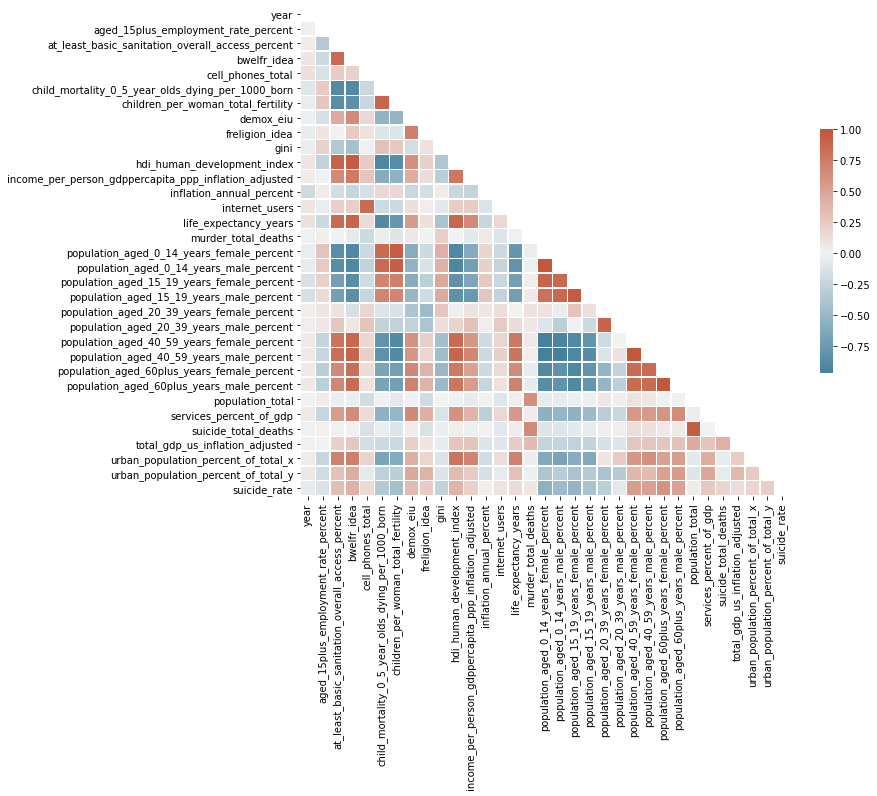

In [300]:
#plt.matshow(X_train.corr())
#plt.colorbar()
#plt.show()

train2 = train
train2['suicide_rate'] = train2['suicide_total_deaths']/train2['population_total']
train2['internet_users'] = train2['internet_users']/train2['population_total']
train2['cell_phones_total'] = train2['cell_phones_total']/train2['population_total']
corr = train2.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can observe a positive correlation between the rate of suicides and proportion of the populage of a higher age as well with the wellfare index and democracy index. Moreover we can observe negative correlations with the proportion of young people in the population. Therefore it will be important to include these in the modelisation. Also there are multiple features that are very correlated so some feature selection or dimensonality reduction will probably be useful. 

In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 34 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                1408 non-null   object 
 1   year                                                   1408 non-null   int64  
 2   aged_15plus_employment_rate_percent                    1408 non-null   float64
 3   at_least_basic_sanitation_overall_access_percent       1408 non-null   float64
 4   bwelfr_idea                                            1408 non-null   float64
 5   cell_phones_total                                      1408 non-null   float64
 6   child_mortality_0_5_year_olds_dying_per_1000_born      1408 non-null   float64
 7   children_per_woman_total_fertility                     1408 non-null   float64
 8   demox_eiu                                       

In [333]:
import geopandas as geo
import country_converter as cv



countries = pd.DataFrame(pd.read_csv('data/processed/geo_data_per_country.csv'))
train_geo = train.merge(countries,left_on='country',right_on = 'country')

train_geo['suicide_rate'] = train_geo['suicide_total_deaths']/train_geo['population_total']
geo_set = train_geo[train_geo['year']==2014]



geo_set = geo_set[['country','suicide_rate','suicide_total_deaths','demox_eiu','hdi_human_development_index','bwelfr_idea','population_aged_0_14_years_female_percent','freligion_idea','latitude','longitude',]]
indices = geo_set[(geo_set['country']=='Bahrain')|(geo_set['country']=='Cyprus')|(geo_set['country']=='Singapore') | (geo_set['country']=='Mauritius')].index
geo_set = geo_set.drop(indices,axis=0)


world = geo.read_file(geo.datasets.get_path("naturalearth_lowres"))
matching_dict = cv.match(geo_set['country'], world['name'])



geo_set['country'] = matching_dict.values()
geo_final = world.merge(geo_set, left_on='name', right_on='country')


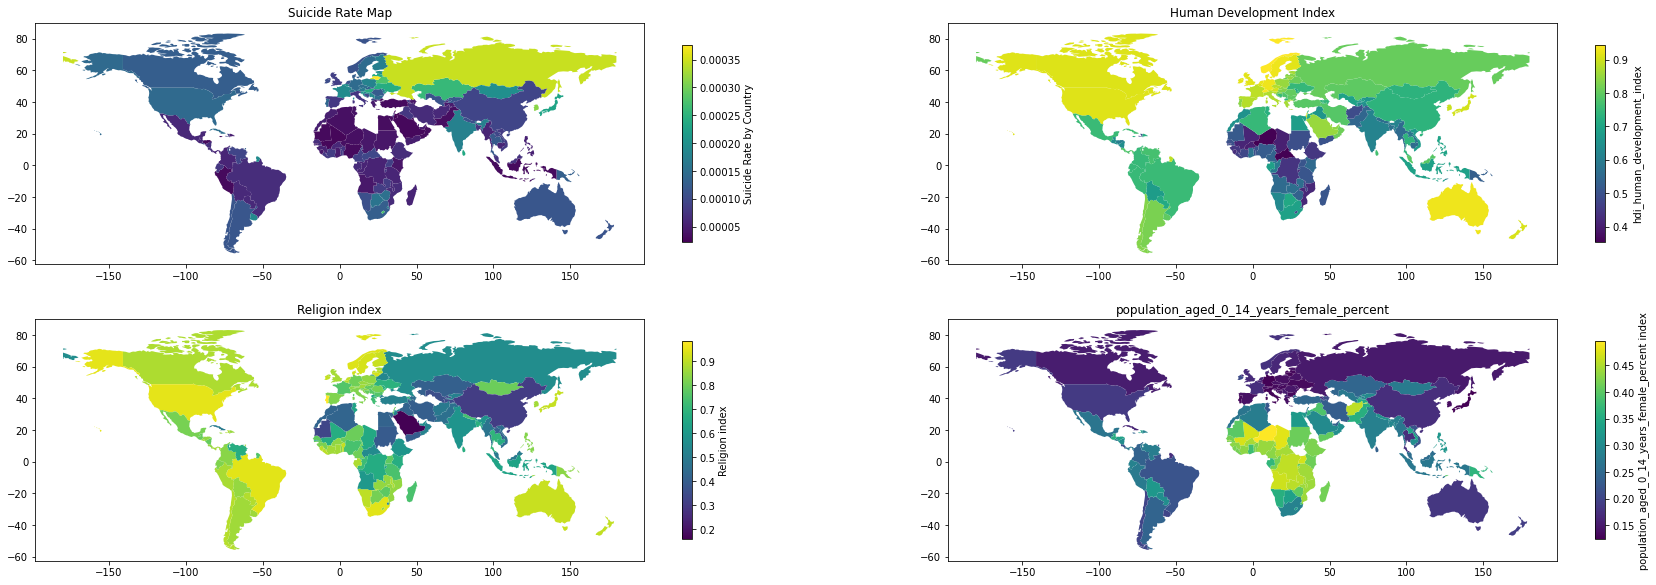

In [351]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize = (30,10))
geo_final.plot('suicide_rate',ax=ax1,legend = True,legend_kwds={"label":"Suicide Rate by Country",'shrink':0.8} )
ax1.title.set_text("Suicide Rate Map")
geo_final.plot('hdi_human_development_index',ax=ax2,legend = True,legend_kwds={"label":"hdi_human_development_index",'shrink':0.8} )
ax2.title.set_text("Human Development Index")
geo_final.plot('freligion_idea',ax=ax3,legend = True,legend_kwds={"label":"Religion index",'shrink':0.8} )
ax3.title.set_text("Religion index")
geo_final.plot('population_aged_0_14_years_female_percent',ax=ax4,legend = True,legend_kwds={"label":"population_aged_0_14_years_female_percent index",'shrink':0.8} )
ax4.title.set_text("population_aged_0_14_years_female_percent")

We can see that countries with a low proportion of young females index seem to have higher suicide rate and that the religion index seems to play a role. Moreover, we can see that although there seems to be a correlation between HDI and suicide rate judging from the correlation plot, that multiple countries with low HDI have low suicide rates so there are other variables coming into place. 

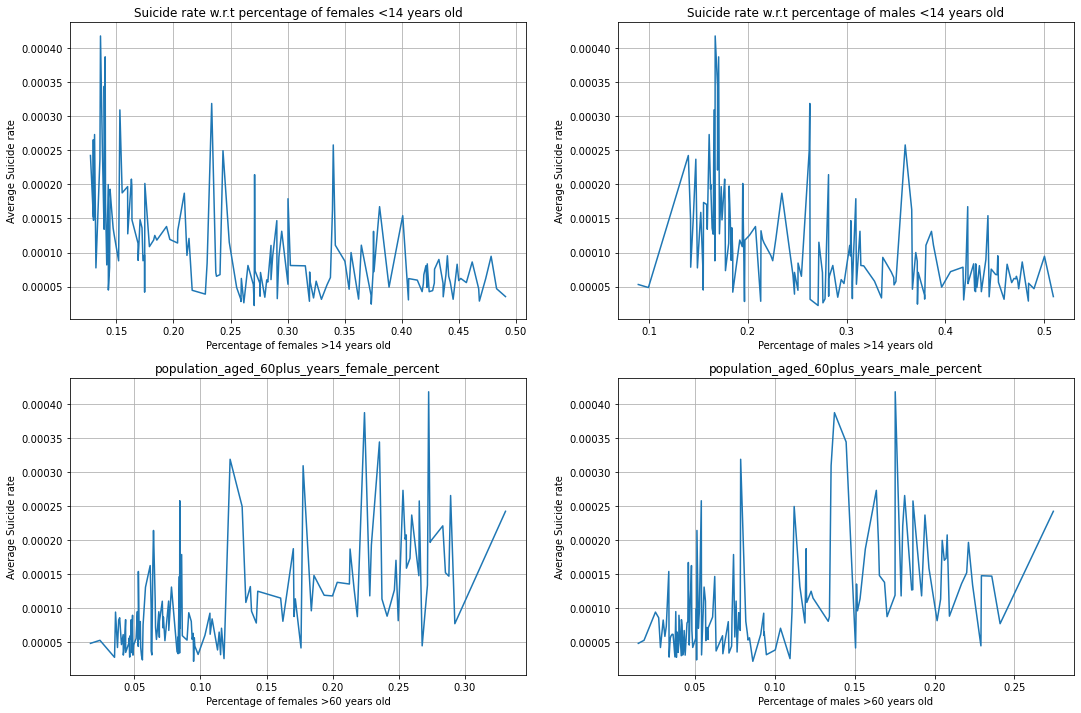

In [339]:
sorted_female14 = train.groupby('country').mean().sort_values('population_aged_0_14_years_female_percent')
fig, ((ax1,ax2),(ax3,ax4))  = plt.subplots(ncols=2,nrows=2,figsize = (18,12))
ax1.plot(sorted_female14['population_aged_0_14_years_female_percent'],sorted_female14['suicide_rate'])
ax1.title.set_text('Suicide rate w.r.t percentage of females <14 years old')
ax1.grid()
ax1.set_xlabel('Percentage of females >14 years old')
ax1.set_ylabel('Average Suicide rate')
sorted_female14 = train.groupby('country').mean().sort_values('population_aged_0_14_years_male_percent')


ax2.plot(sorted_female14['population_aged_0_14_years_male_percent'],sorted_female14['suicide_rate'])
ax2.title.set_text('Suicide rate w.r.t percentage of males <14 years old')
ax2.grid()
ax2.set_xlabel('Percentage of males >14 years old')
ax2.set_ylabel('Average Suicide rate')

sorted_female14 = train.groupby('country').mean().sort_values('population_aged_60plus_years_female_percent')


ax3.plot(sorted_female14['population_aged_60plus_years_female_percent'],sorted_female14['suicide_rate'])
ax3.title.set_text('population_aged_60plus_years_female_percent')
ax3.grid()
ax3.set_xlabel('Percentage of females >60 years old')
ax3.set_ylabel('Average Suicide rate')
sorted_female14 = train.groupby('country').mean().sort_values('population_aged_60plus_years_male_percent')


ax4.plot(sorted_female14['population_aged_60plus_years_male_percent'],sorted_female14['suicide_rate'])
ax4.title.set_text('population_aged_60plus_years_male_percent')
ax4.set_xlabel('Percentage of males >60 years old')
ax4.set_ylabel('Average Suicide rate')
ax4.grid()

Here we can see a trend appearing when looking at the values of the average suicide rates by country with respect to the proportion of the population above a certain age. Indeed it seems that the higher the proportion of older people in a country the higher the suicide rate is while the higher the proportion of young people in the population the lower the suicide rate is. 